In [1]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr


In [3]:
start = '2010-01-01'
end = '2022-12-31'

#creating dataframe
df = pdr.DataReader('AAPL', 'stooq', start, end)                #use stooq
reversed_df = df.iloc[::-1]                         #reverse
df=reversed_df
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-23,130.92,132.4150,129.64,131.86,63814893.0
2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2022-12-30,128.41,129.9500,127.43,129.93,77034209.0


In [5]:
df_withoutDate = df.reset_index()
df_withoutDate.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [6]:
df1 = df_withoutDate.drop(['Date'], axis=1)
df1.head()

,Open,High,Low,Close,Volume
0,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,6.40586,6.45421,6.36458,6.45401,5.246856e+08


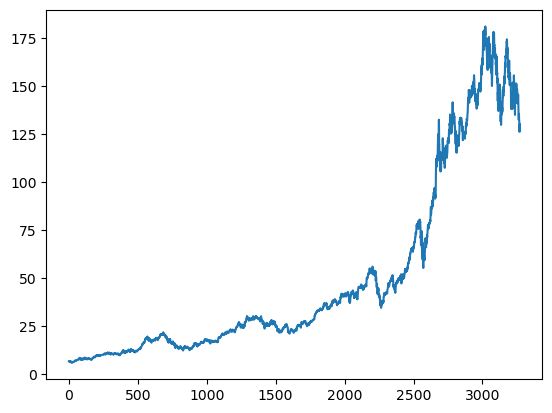

In [7]:
plt.plot(df1.Close)

In [8]:
#moving average
ma100 = df1.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3267    150.34697
3268    149.99421
3269    149.60385
3270    149.25398
3271    148.90681
Name: Close, Length: 3272, dtype: float64

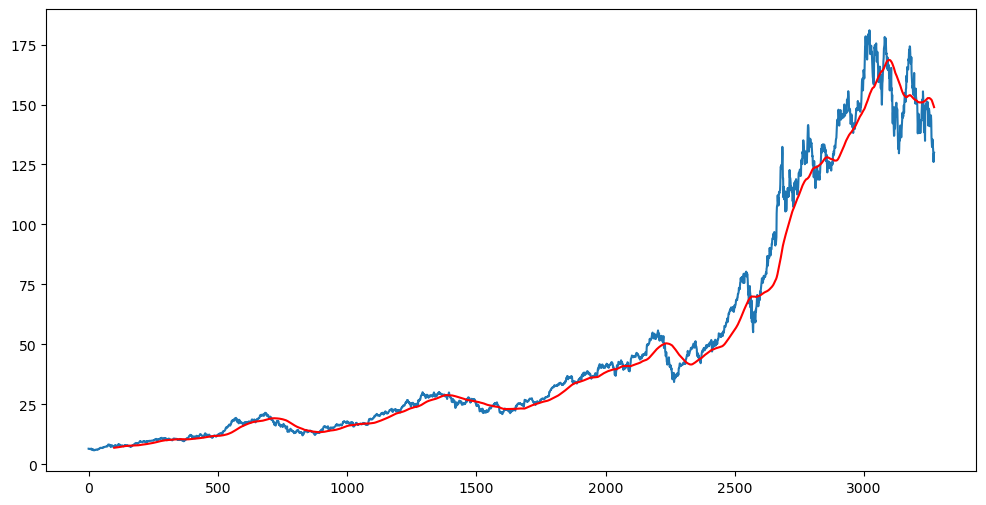

In [9]:
plt.figure(figsize= (12,6))
plt.plot(df1.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df1.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    151.767550
3268    151.647550
3269    151.528040
3270    151.404145
3271    151.259420
Name: Close, Length: 3272, dtype: float64

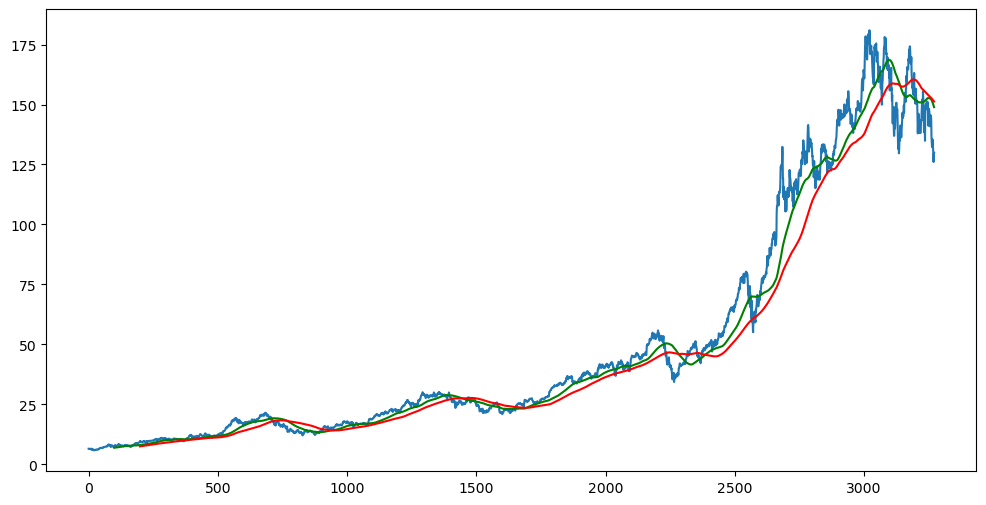

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df1.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [12]:
df1.shape

(3272, 5)

In [13]:
#use of closing column only and then split into T&T

data_training = pd.DataFrame(df1['Close'][0:int(len(df1)*0.70)])                   #use'Close'
data_testing = pd.DataFrame(df1['Close'][int(len(df1)*0.70):int(len(df1))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [14]:
#scale down data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_arr = scaler.fit_transform(data_training)
data_training_arr

array([[0.01338642],
       [0.01361001],
       [0.01152464],
       ...,
       [0.72424467],
       [0.72454493],
       [0.70861934]])

In [16]:
data_training_arr.shape

(2290, 1)

In [17]:
#defing training data inputs and outputs

x_train = []
y_train = []

for i in range(100, data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100: i])
    y_train.append(data_training_arr[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(2190, 100, 1)

In [19]:
# lstm model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
# add o h l

#adding layer 1
model.add(LSTM(units = 70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
#adding layer 2
model.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
#adding layer 3
model.add(LSTM(units = 120, activation = 'relu'))          #no return seq
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 70)           33880     
                                                                 
 dropout_1 (Dropout)         (None, 100, 70)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 90)           57960     
                                                                 
 dropout_2 (Dropout)         (None, 100, 90)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               1

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 17s 180ms/step - loss: 0.0283
Epoch 2/50
69/69 [==============================] - 12s 178ms/step - loss: 0.0064
Epoch 3/50
69/69 [==============================] - 12s 176ms/step - loss: 0.0054
Epoch 4/50
69/69 [==============================] - 12s 176ms/step - loss: 0.0052
Epoch 5/50
69/69 [==============================] - 12s 177ms/step - loss: 0.0051
Epoch 6/50
69/69 [==============================] - 12s 177ms/step - loss: 0.0043
Epoch 7/50
69/69 [==============================] - 12s 179ms/step - loss: 0.0039
Epoch 8/50
69/69 [==============================] - 12s 180ms/step - loss: 0.0040
Epoch 9/50
69/69 [==============================] - 12s 180ms/step - loss: 0.0038
Epoch 10/50
69/69 [==============================] - 12s 181ms/step - loss: 0.0039
Epoch 11/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0036
Epoch 12/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0035
Epoch 13/50
6

In [35]:
model.save('model2.h5')

C:\Users\DAS'BEAST\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#append 100 to test
past_100days = data_training.tail(100)

In [25]:
final_df = pd.concat([past_100days, data_testing], ignore_index=True)  # deprecated append removed

In [26]:
final_df.head()

,Close
0,53.8258
1,52.3882
2,52.4769
3,52.5088
4,52.9036


In [27]:
input_test_data = scaler.fit_transform(final_df)

In [28]:
input_test_data.shape

(1082, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_test_data.shape[0]):
    x_test.append(input_test_data[i-100: i])
    y_test.append(input_test_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [30]:
#predictor

y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 49ms/step


In [31]:
y_predicted.shape

(982, 1)

In [32]:
sf = scaler.scale_    #factor of scaling used before

In [33]:
scale_factor = 1/sf[0]
y_predicted_scaled = y_predicted * scale_factor
y_test_scaled = y_test * scale_factor

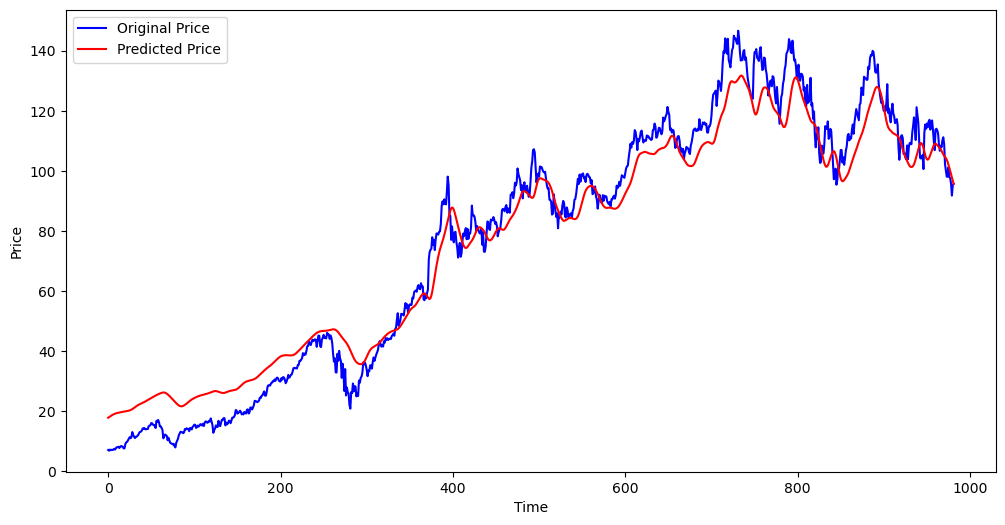

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, 'b', label = 'Original Price')
plt.plot(y_predicted_scaled, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()